In [1]:
#générer le Login des votants
def login():
    with open("manar_listeElectorale.txt",'r') as f:
        L=f.readlines()
        e='E'
        a='00'
        b='0'
        lg=len(L)
        if(0<=lg<=9):
            return e+a+str(lg)
        elif(10<=lg<=99):
            return e+b+str(lg)
        else:
            return e+str(lg)

In [2]:
#générer le Mot de passe des votants
import numpy as np
def password():
    Ltr=""
    Nbr=""
    a=np.random.randint(0,9,4)
    for e in a:
        Nbr=Nbr+str(e)
    b=np.random.choice([chr(x) for x in range(65,90)],4)
    for el in b:
        Ltr=Ltr+el
    return (Ltr+'@'+Nbr)

In [3]:
#Eviter une deuxiéme inscription de méme Nom et Prenom
def dejaInscrit(prn,nom):
    with open("manar_listeElectorale.txt",'r') as f:
        L=f.readlines()
        for el in L:
            T=el.split('\t')
            if(T[1]==prn.upper() and T[2]==nom.upper()):
                return 0
        return 1

In [4]:
import pickle
def inscription():
    nm=input("saisir votre Nom: ")
    prn=input("Saisir votre Prenom: ")
    if(dejaInscrit(prn,nm)==0):
        print("\n")
        print("\t\tVous êtes déja inscrit!!")
    else:
        t=(login(),password())
        print('*** inscription réussie *** ')
        print("Votre Login: ",t[0],"\tVotre Mot de pass: ",t[1])
        #Sauvegarder les informations des votants 
        with open("manar_listeElectorale.txt",'a') as f:
            f.write(t[0]+'\t'+prn.upper()+'\t'+nm.upper()+'\t'+t[1]+'\n')
        #lire le fichier 'votants':un dictionnaire d[(login,mdp):0 ou 1]
        with open('manar_votants','rb') as F:
            depick=pickle.Unpickler(F)
            d=depick.load()
        #Attribuer la valeur 0 au (login,mdp) de votant (Avant le vote)
        d[t]=0
        #Stocker la dictionnaire dans le fichier 'votants'
        with open('manar_votants','wb') as F:
            pick=pickle.Pickler(F)
            pick.dump(d)

In [5]:
def afficheCandidats():
    with open("manar_listeCandidats.txt",'r') as f:
        for e in f:
            print('\t'+e.rstrip())

In [6]:
import pickle
def voter():
    #récuperer le login et le mdp du votant
    code=input("Saisir votre Login: ")
    mdp=input("saisir votre Mot de pass: ")
    #stocker le login et le mdp dans un tuple
    tple=(code.upper(),mdp.upper())
    #Lire le fichier 'résultatCandidat' : un dictionnaire d['C1':_,'C2':_,'C3':_,'C4':_]
    with open('manar_resultatCandidat','rb') as f:
        depick=pickle.Unpickler(f)
        d=depick.load()
    #Lire le fichier 'votants' un dictionnaire v[(login,mdp):0 ou 1]
    with open('manar_votants','rb') as f:
        depick=pickle.Unpickler(f)
        v=depick.load()
    #vérifier le login et le mdp
    if(tple not in v):
        print("Login ou/et Mot de passe incorrecte(s)****Assurez_vous que vous êtes inscrit!!")
    #Eviter un deuxiéme Vote (v[(login,mdp)]==1)
    elif(v[tple]==1):
        print('\n')
        print("\t\tvous avez déja Voté!!!!")
    #Autoriser le vote aprés le controle
    else:
        print("\n")
        afficheCandidats()
        ch=input("Quel est votre choix? ")
        cf=input("confirmer votre choix (Y/N)")
        while(cf=='n' or cf=='N'):
            afficheCandidats()
            ch=input("Quel est votre choix? ")
            cf=input("confirmer votre choix (Y/N)")
        #incrémenter le nombre des votes du candidat ch(choix)
        d[ch.upper()]+=1 
        #stocker le dictionnaire des resultatCandidats
        with open('manar_resultatCandidat','wb') as f:
            pick=pickle.Pickler(f)
            pick.dump(d)
        #Affecter la valeur 1 au clé (login,mdp) de votant
        v[tple]=1
        #stocker le dictionnaire des votants
        with open('manar_votants','wb') as f:
            pick=pickle.Pickler(f)
            pick.dump(v)

In [7]:
from matplotlib import pyplot as plt
def statistique():
    candidats=["C1:MALAK"+'\n'+"BENJELLOUN","C2:MOUNIR"+'\n'+"AJANA","C3:FATIHA"+'\n'+"SOUKAD",'C4:BLANC']
    T=[]
    L=[]
    print("\n\t\t***********Résultat Election**************" )
    #Lire le fichier resultatCandidat (dictionnaire)
    with open('manar_resultatCandidat','rb') as f:
        depick=pickle.Unpickler(f)
        d=depick.load()
    #Récuperer les résultats
    a=d['C1']
    b=d['C2']
    c=d['C3']
    e=d['C4']
    #Récupérer le nombre total des votants
    somme=a+b+c+e
    #Récuperer le nombre total des inscriptions
    with open("manar_listeElectorale.txt",'r') as f:
        n=0
        for line in f:
            n+=1
    print("\n\tNombre de votants: ",somme,'/',n,'\n')
    with open("manar_listeCandidats.txt",'r') as f:
        L=f.readlines()
        for el in L:
            T.append(el.split(':'))
    print('\t',T[0][1][:-1],'-->',a,'votans')
    print('\t',T[1][1][:-1],'\t','-->',b,'votans')
    print('\t',T[2][1][:-1],'\t','-->',c,'votans')
    print('\t',T[3][1],'\t','\t','-->',e,'votans','\n\n')
    data = [a/somme , b/somme , c/somme , e/somme]
    expl=(0,0,0,0)
    plt.pie(data , explode = expl , labels = candidats ,autopct='%1.1f%%' , startangle=90 , shadow=True)
    plt.axis('equal')
    plt.title("Graphique Resultats Election")
    plt.show()

In [8]:
def menu():
    print('------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------')
    print('\t\t\t1 : Inscription')
    print('\t\t\t2 : Liste candidats')
    print('\t\t\t3 : Voter')
    print('\t\t\t4 : Statistiques')
    print('\t\t\t5 : Quitter')
    print('------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------')

In [9]:
def main():
    menu()
    choix=input("Taper Votre choix: ")
    while(choix!='5'):
        if(choix=='1'):
            print("\n")
            inscription()
            menu()
            choix=input("Taper Votre choix: ")
        elif(choix=='2'):
            print("\n")
            afficheCandidats()
            menu()
            choix=input("Taper Votre choix: ")
        elif(choix=='3'):
            print("\n")
            voter()
            menu()
            choix=input("Taper Votre choix: ")
        elif(choix=='4'):
            print("\n")
            statistique()
            menu()
            choix=input("Taper Votre choix: ")

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
			1 : Inscription
			2 : Liste candidats
			3 : Voter
			4 : Statistiques
			5 : Quitter
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Taper Votre choix: 4



		***********Résultat Election**************

	Nombre de votants:  7 / 9 

	 MALAK BENJELLOUN --> 3 votans
	 MOUNIR AJANA 	 --> 2 votans
	 FATIHA SOUKAD 	 --> 1 votans
	 BLANC 	 	 --> 1 votans 




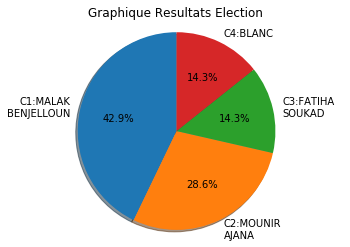

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
			1 : Inscription
			2 : Liste candidats
			3 : Voter
			4 : Statistiques
			5 : Quitter
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Taper Votre choix: 1


saisir votre Nom: chawki
Saisir votre Prenom: noueman


		Vous êtes déja inscrit!!
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
			1 : Inscription
			2 : Liste candidats
			3 : Voter
			4 : Statistiques
			5 : Quitter
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Taper Votre choix: 3


Saisir votr

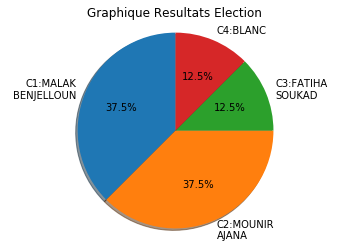

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
			1 : Inscription
			2 : Liste candidats
			3 : Voter
			4 : Statistiques
			5 : Quitter
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Taper Votre choix: 5


In [10]:
main()